In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/2025-2026/KHDL/Crawl Data

/content/drive/MyDrive/2025-2026/KHDL/Crawl Data


In [ ]:
!ls

 brands.csv		      encod_data.csv		   normalization_data.csv
 clean_data.csv		     'feature engineering.ipynb'   phone_data.csv
'Clean&&Nomalization.ipynb'   introduce.ipynb		   selected_features.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Đọc file CSV

In [ ]:
df = pd.read_csv("encod_data.csv")
df.head()

,Unnamed: 0,brand,ram,storage,battery,charging,price
0,0,27,0.374389,0.111111,0.430108,0.196617,0.130435
1,1,31,0.374389,0.111111,0.494624,0.365751,0.090527
2,2,2,0.499511,0.111111,0.376344,0.154334,0.340475
3,3,2,0.499511,0.238095,0.376344,0.154334,0.401386
4,4,2,0.499511,0.492063,0.376344,0.154334,0.508507


In [ ]:
selected_columns = ["brand", "ram", "storage", "battery", "charging",  "price"]
df= df[selected_columns]
df.head()

,brand,ram,storage,battery,charging,price
0,27,0.374389,0.111111,0.430108,0.196617,0.130435
1,31,0.374389,0.111111,0.494624,0.365751,0.090527
2,2,0.499511,0.111111,0.376344,0.154334,0.340475
3,2,0.499511,0.238095,0.376344,0.154334,0.401386
4,2,0.499511,0.492063,0.376344,0.154334,0.508507


#Tính toán tương quan giữa các feature với biến mục tiêu Price

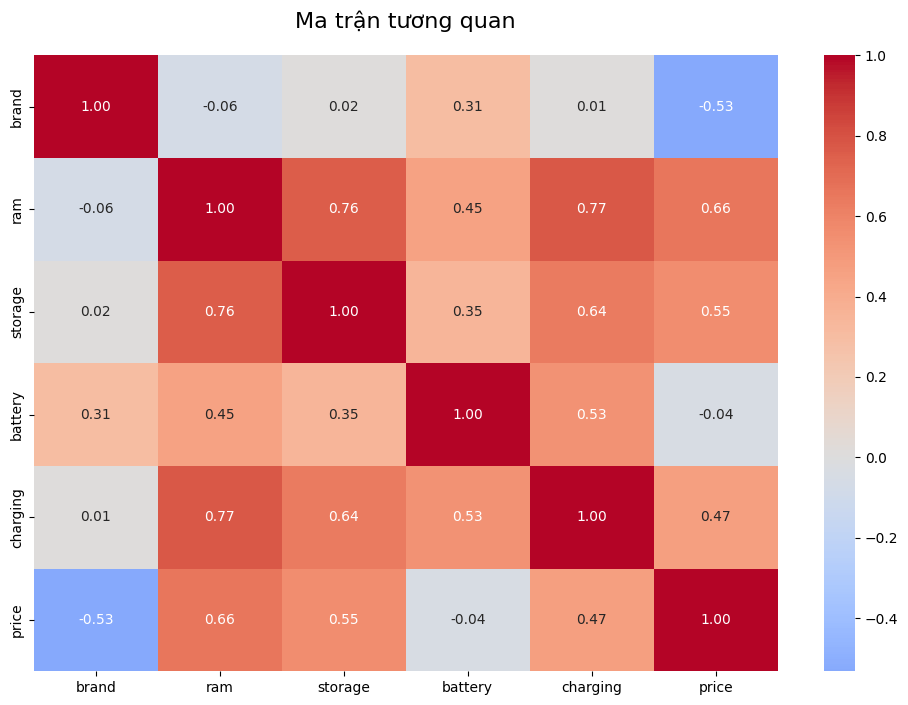

In [ ]:
# Tính toán ma trận tương quan với phương pháp Spearman
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0)
plt.title("Ma trận tương quan", pad=20, fontsize=16)
plt.show()

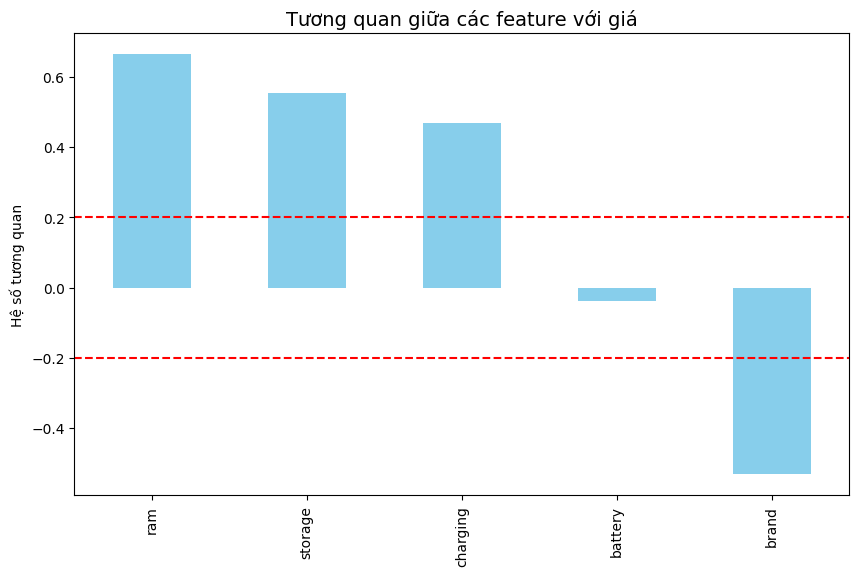

In [ ]:
target_corr = corr_matrix['price'].sort_values(ascending=False)

# Vẽ biểu đồ thanh tương quan với 'price'
plt.figure(figsize=(10, 6))
target_corr.drop('price').plot(kind='bar', color='skyblue')
plt.axhline(y=0.2, color='r', linestyle='--')
plt.axhline(y=-0.2, color='r', linestyle='--')
plt.title("Tương quan giữa các feature với giá", fontsize=14)
plt.ylabel("Hệ số tương quan")
plt.show()

Loại bỏ các feature có tương quan với Price thấp ( <0.2)


Index(['brand', 'ram', 'storage', 'charging', 'price'], dtype='object')


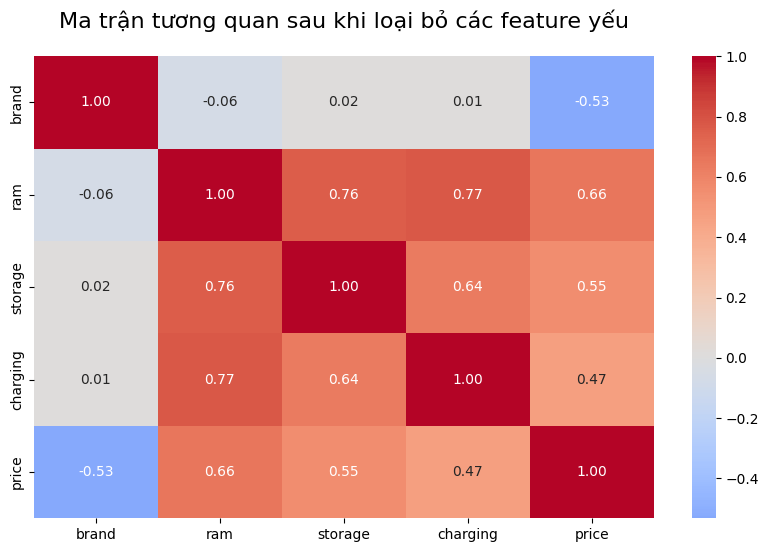

In [ ]:
threshold = 0.2
selected_features = corr_matrix['price'][abs(corr_matrix['price']) > threshold].index
df_selected = df[selected_features]
print(selected_features)

corr_matrix_selected = df_selected.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Ma trận tương quan sau khi loại bỏ các feature yếu", pad=20, fontsize=16)
plt.show()

# Kiểm tra tương quan cuả các feature đã chọn

VIF (Hệ số lạm phát phương sai - Variance Inflation Factor) là một chỉ số dùng để phát hiện đa cộng tuyến (multicollinearity) giữa các biến độc lập trong mô hình hồi quy.

🔹 Mục tiêu: Nếu một biến có VIF cao, nghĩa là biến đó có mối tương quan mạnh với một hoặc nhiều biến khác, có thể gây ảnh hưởng xấu đến mô hình hồi quy.

In [ ]:
features = df_selected.drop(columns=["price"]).columns
print(features)
while True:
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]

    vif_data = vif_data.sort_values(by="VIF", ascending=False)
    print("\nVIF cho các feature còn lại:")
    print(vif_data)

    # Nếu tất cả VIF đều < 10, dừng vòng lặp
    if vif_data["VIF"].iloc[0] < 10:
        break

    # Loại bỏ feature có VIF cao nhất
    drop_feature = vif_data["feature"].iloc[0]
    print(f"\nLoại bỏ feature có VIF cao nhất: {drop_feature}")
    features.remove(drop_feature)
print("\nCác feature còn lại sau khi loại bỏ VIF cao:")
print(features)

Index(['brand', 'ram', 'storage', 'charging'], dtype='object')

VIF cho các feature còn lại:
    feature       VIF
1       ram  8.904621
3  charging  5.459479
2   storage  3.484991
0     brand  2.653393

Các feature còn lại sau khi loại bỏ VIF cao:
Index(['brand', 'ram', 'storage', 'charging'], dtype='object')


#Xuất các feature đã được lựa chọn và dữ liệu

In [ ]:
df_selected = df_selected[features]
df_selected["price"] = df["price"]
df_selected.head()

,brand,ram,storage,charging,price
0,27,0.374389,0.111111,0.196617,0.130435
1,31,0.374389,0.111111,0.365751,0.090527
2,2,0.499511,0.111111,0.154334,0.340475
3,2,0.499511,0.238095,0.154334,0.401386
4,2,0.499511,0.492063,0.154334,0.508507


In [ ]:
df_selected.to_csv("selected_features.csv", index=False)